# ДЗ

### 1) Попытаться ответить на вопросы/выдвинуть гипотезы

**Ожидание:**
- Отправляем e-mail с топ-10 товарами, отсортированными по вероятности

**Реальность:**
- **Чего хочет менеджер от рекомендательной системы? По-хорошему надо бы предварительно посчитать потенциальный эффект от рекоммендательной системы (Оценки эффектов у менеджера и у вас могут сильно не совпадать: как правило, вы знаете про данные больше)**
--  Рост выручки на 5% за 3 месяца. Будем повышать за счет удержаний клиентов и повышения среднего чека. 
- **А у нас вообще есть e-mail-ы пользователей? Для скольки %? Не устарели ли они?**
-- Рекомендательные системы - это итеративный процесс и можно либо в рамках него, либо поручить в другой ИТ отдел проверить актуальность email-ов, использую сервисы-рассылок, врое UniSender, которые подскажу статус плучения/прочтения письма адресатом. Таким образом можно будет составить базу актуальных и действующих email-ов и только им отправлять письма.
- **Будем ли использовать СМС и push-уведомления в приложении? Может, будем печатать рекомендации на чеке после оплаты на кассе?**
-- Смс, сегодня будто бы уже недешевое удовольствие, тем более для рассылки объемных рекомендаций. Думаю, начать можно было бы с email, mobile push и web push notifications. Можно так же печатать ТОП 3 и на чеке, если это оффлайн магазин, а не интернет платформа. Как правило, при покупке в Интернет приходит электронный чек от ОФД на почту, не уверен, что кто-то его читает, но эксперимент провести можно.
- **Как будет выглядеть e-mail? (решаем задачу топ-10 рекомендаций или ранжирования? И топ-10 ли?)**
-- В наше время, все больше людей попадают в Интернет со смартфонов, а не с ПК, и если на ПК еще можно было бы в письме удобро расположить 10 товаров и быть может кто-то бы их просмотрел, то на смартфоне уже вряд ли, думаю было бы достаточно ТОП 5 отранжированных рекомендаций.
- **Какие товары должны быть в e-mail? Есть ли какие-то ограничения (только акции и т п)?**
-- Похоже, что рекомендации по Акциям - это одна рассылка, а рекомендации к тому, что ты купил другая, хотя в случае с интернет-платформой, лучше сразу выдавать реакомендации к товару прямо на странице оформления заказа или корзины, к примеру, предложить к смартфону блок питания, так как Apple заботится об экологическом следе.
- **Сколько денег мы готовы потратить на привлечение 1 юзера? CAC - Customer Aquisition Cost. Обычно CAC = расходы на коммуникацию + расходы на скидки**
-- Пока сложно, что либо ответить тут, похоже, что зависит от размера компании или маркетплейса.
- **Сколько мы хотим зарабатывать с одного привлеченного юзера?**
-- Тоже сложно сказать, мы можем привлечь июзера, который купит стекло на экран за 500 рублей, а можем привлечь юзера, который купит домашний кинотеатр за 100 000 рублей к телевизору по рекомендации. Думаю станет ясно по ходу использования рекомендательной системы.

---
- **А точно нужно сортировать по вероятности?**
-- Не попробовав, не поймешь точно.
- **Какую метрику использовать?**
--Precision
- **Сколько раз в неделю отпрпавляем рассылку?**
-- 1 раз в неделю (далее смотреть на отток клиентов :))
- **В какое время отправляем рассылку?**
-- Будние дни в 12:00
- **Будем отправлять одному юзеру много раз наши рекоммендации. Как добиться того, чтобы они хоть немного отличались?**
-- Вот это хороший вопрос, некоторые магазины сегодня рекомендуют одни и те же наушники, просто разных цветов, возможно необходимо как-то выполнить прфильтрация/группировку товаров заранее перед обучением модели или после обучения, чтобы не высылать человеку ТОП 5 наушников к смартфону, хотя можно еще предложить провод, стекло и т.д.
- **Нужно ли, чтобы в одной рассылке были *разные* товары? Как определить, что товары *разные*? Как добиться того, чтобы они были разными?**
-- Да, товары должны быть разные. Сложно определить, что они разные на уровне обучения, товары необходимо выводить по 1 из группы, например 1 наушники, 1 блок питания, 1 самовар. Наверное, можно вывести топ 100 рекомендаций и затем с-join-ить их с группами товаров, получить по 1 товару из группы, но пока точно неясно насколько это эффективно и правильно, хотя и имеет право на жизнь.


### 2) Доделать прошлые домашния задания
Доделано

### 3) Прочитать статьи BM25/MatrixFactorization
Прочитано

https://datasciencemadesimpler.wordpress.com/tag/alternating-least-squares/ - прям хорошая статья

## Практика:

**4) Поэкспериментировать с ALS (grid-search)**

In [15]:
import warnings
from metrics import precision_at_k, recall
from implicit.nearest_neighbours import bm25_weight, tfidf_weight
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 


warnings.simplefilter('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Arial'

# Зарузим данные по продажам
data = pd.read_csv('../ex2/webinar_2/retail_train.csv')

data.columns = [col.lower() for col in data.columns]
data.rename(columns={'household_key': 'user_id','product_id': 'item_id'}, inplace=True)

test_size_weeks = 3

# разделим данные
data_train = data[data['week_no'] < data['week_no'].max() - test_size_weeks]
data_test = data[data['week_no'] >= data['week_no'].max() - test_size_weeks]

print('\n===DATA_TRAIN===\n') 
display(data_train.head(3))


# зарузим данные по характеристикам
item_features = pd.read_csv('../ex2/webinar_2/product.csv')
item_features.columns = [col.lower() for col in item_features.columns]
item_features.rename(columns={'product_id': 'item_id'}, inplace=True)

print('\n===ITEM_FEATURES TOP 3===\n')
display(item_features.head(3))

# посмотрим уникальные подразделения
print('\n===DEPARTMENTS TOP 3===\n')
display(item_features.department.unique())

# получим актуальные данные для тестовой выборки
print('\n===USER ACTUALS TOP 3===\n')
result = data_test.groupby('user_id')['item_id'].unique().reset_index()
result.columns = ['user_id', 'actual']
display(result.head(3))

# получим популярные товары
popularity = data_train.groupby('item_id')['quantity'].sum().reset_index()
popularity.rename(columns={'quantity': 'n_sold'}, inplace=True)

top_5000 = popularity.sort_values('n_sold', ascending=False).head(5000).item_id.tolist()

print('\n===POPULAR TOP 5000 TOP 3===\n')
display(top_5000[:3])

# Заведем фиктивный item_id
data_train.loc[~data_train['item_id'].isin(top_5000), 'item_id'] = 999999

# перевернем таблицу в user-item
user_item_matrix = pd.pivot_table(data_train,
                                  index='user_id', columns='item_id',
                                  values='quantity',
                                  aggfunc='count',
                                  fill_value=0
                                  )

user_item_matrix = user_item_matrix.astype(float) 

# переведем в формат saprse matrix
sparse_user_item = csr_matrix(user_item_matrix)

print('\n===USER-ITEM MATRIX TOP 3===\n')
display(user_item_matrix.head(3))


# grid-search

userids = user_item_matrix.index.values
itemids = user_item_matrix.columns.values

matrix_userids = np.arange(len(userids))
matrix_itemids = np.arange(len(itemids))

id_to_itemid = dict(zip(matrix_itemids, itemids))
id_to_userid = dict(zip(matrix_userids, userids))

itemid_to_id = dict(zip(itemids, matrix_itemids))
userid_to_id = dict(zip(userids, matrix_userids))

# TF-IDF взвешивание
sparse_user_item_tfidf = tfidf_weight(user_item_matrix.T).T

# BM25 взвешивание
user_item_matrix_bm25 = bm25_weight(user_item_matrix.T).T


def get_model_recommend(user_id):
    return model.recommend(userid=userid_to_id[user_id],
                           user_items=sparse_user_item,
                           N=5,
                           filter_already_liked_items=False,
                           filter_items=[itemid_to_id[999999]], recalculate_user=True)

score_dict = {}
for factors in range(100, 200, 20):
    for reg in (np.linspace(0.05, 10)):
        model = AlternatingLeastSquares(factors=factors,
                                        regularization=reg,
                                        iterations=15,
                                       calculate_training_loss=True,
                                        num_threads=4,
                                        random_state=13)
        
        model.fit(csr_matrix(user_item_matrix_bm25).T, show_progress=False)

        result['als'] = result['user_id'].apply(lambda x: [id_to_itemid[rec[0]] for rec in get_model_recommend(x)]                                                                            )
                                                           
        score = result.apply(lambda row: precision_at_k(row['als'], row['actual'], 5), axis=1).mean()
        
        res_str = f'f={factors}_reg={round(reg,3)}'
        score_dict[res_str] = score
        
        print(f'\n{res_str} score={score}')
      

print('\ntotal_res\n')
display(score_dict)




===DATA_TRAIN===



,user_id,basket_id,day,item_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0



===ITEM_FEATURES TOP 3===



,item_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,



===DEPARTMENTS TOP 3===



array(['GROCERY', 'MISC. TRANS.', 'PASTRY', 'DRUG GM', 'MEAT-PCKGD',
       'SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI', 'COSMETICS',
       'MEAT', 'FLORAL', 'TRAVEL & LEISUR', 'SEAFOOD', 'MISC SALES TRAN',
       'SALAD BAR', 'KIOSK-GAS', 'ELECT &PLUMBING', 'GRO BAKERY',
       'GM MERCH EXP', 'FROZEN GROCERY', 'COUP/STR & MFG', 'SPIRITS',
       'GARDEN CENTER', 'TOYS', 'CHARITABLE CONT', 'RESTAURANT', 'RX',
       'PROD-WHS SALES', 'MEAT-WHSE', 'DAIRY DELI', 'CHEF SHOPPE', 'HBC',
       'DELI/SNACK BAR', 'PORK', 'AUTOMOTIVE', 'VIDEO RENTAL', ' ',
       'CNTRL/STORE SUP', 'HOUSEWARES', 'POSTAL CENTER', 'PHOTO', 'VIDEO',
       'PHARMACY SUPPLY'], dtype=object)


===USER ACTUALS TOP 3===



,user_id,actual
0,1,"[821867, 834484, 856942, 865456, 889248, 90795..."
1,3,"[835476, 851057, 872021, 878302, 879948, 90963..."
2,6,"[920308, 926804, 946489, 1006718, 1017061, 107..."



===POPULAR TOP 5000 TOP 3===



[6534178, 6533889, 6534166]


===USER-ITEM MATRIX TOP 3===



item_id,202291,397896,420647,480014,545926,707683,731106,818980,819063,819227,...,15778533,15831255,15926712,15926775,15926844,15926886,15927403,15927661,15927850,16809471
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



f=100_reg=0.05 score=0.22389813907933098

f=100_reg=0.253 score=0.22360430950048676

f=100_reg=0.456 score=0.2229187071498501

f=100_reg=0.659 score=0.22095984329088844

f=100_reg=0.862 score=0.2205680705190959

f=100_reg=1.065 score=0.2216454456415248

f=100_reg=1.268 score=0.22037218413319967

f=100_reg=1.471 score=0.22056807051909588

f=100_reg=1.674 score=0.22017629774730363

f=100_reg=1.878 score=0.2203721841331997

f=100_reg=2.081 score=0.2200783545543555

f=100_reg=2.284 score=0.22105778648383645

f=100_reg=2.487 score=0.22095984329088839

f=100_reg=2.69 score=0.22125367286973258

f=100_reg=2.893 score=0.22174338883447306

f=100_reg=3.096 score=0.22193927522036913

f=100_reg=3.299 score=0.22223310479921352

f=100_reg=3.502 score=0.22272282076395394

f=100_reg=3.705 score=0.22203721841331728

f=100_reg=3.908 score=0.22262487757100588

f=100_reg=4.111 score=0.22301665034279822

f=100_reg=4.314 score=0.22370225269343486

f=100_reg=4.517 score=0.2238001958863828

f=100_reg=4.72 sco


f=160_reg=8.782 score=0.24642507345739187

f=160_reg=8.985 score=0.24632713026444386

f=160_reg=9.188 score=0.24642507345739195

f=160_reg=9.391 score=0.24701273261508044

f=160_reg=9.594 score=0.24681684622918426

f=160_reg=9.797 score=0.24779627815866515

f=160_reg=10.0 score=0.24828599412340566

f=180_reg=0.05 score=0.23290891283055523

f=180_reg=0.253 score=0.23339862879529585

f=180_reg=0.456 score=0.23418217433888058

f=180_reg=0.659 score=0.23232125367286663

f=180_reg=0.862 score=0.23202742409402236

f=180_reg=1.065 score=0.2328109696376071

f=180_reg=1.268 score=0.2338883447600361

f=180_reg=1.471 score=0.23418217433888036

f=180_reg=1.674 score=0.23349657198824375

f=180_reg=1.878 score=0.23486777668951705

f=180_reg=2.081 score=0.23476983349656894

f=180_reg=2.284 score=0.23574926542604976

f=180_reg=2.487 score=0.23565132223310167

f=180_reg=2.69 score=0.23663075416258258

f=180_reg=2.893 score=0.2361410381978421

f=180_reg=3.096 score=0.23574926542604976

f=180_reg=3.299 

{'f=100_reg=0.05': 0.22389813907933098,
 'f=100_reg=0.253': 0.22360430950048676,
 'f=100_reg=0.456': 0.2229187071498501,
 'f=100_reg=0.659': 0.22095984329088844,
 'f=100_reg=0.862': 0.2205680705190959,
 'f=100_reg=1.065': 0.2216454456415248,
 'f=100_reg=1.268': 0.22037218413319967,
 'f=100_reg=1.471': 0.22056807051909588,
 'f=100_reg=1.674': 0.22017629774730363,
 'f=100_reg=1.878': 0.2203721841331997,
 'f=100_reg=2.081': 0.2200783545543555,
 'f=100_reg=2.284': 0.22105778648383645,
 'f=100_reg=2.487': 0.22095984329088839,
 'f=100_reg=2.69': 0.22125367286973258,
 'f=100_reg=2.893': 0.22174338883447306,
 'f=100_reg=3.096': 0.22193927522036913,
 'f=100_reg=3.299': 0.22223310479921352,
 'f=100_reg=3.502': 0.22272282076395394,
 'f=100_reg=3.705': 0.22203721841331728,
 'f=100_reg=3.908': 0.22262487757100588,
 'f=100_reg=4.111': 0.22301665034279822,
 'f=100_reg=4.314': 0.22370225269343486,
 'f=100_reg=4.517': 0.2238001958863828,
 'f=100_reg=4.72': 0.22380019588638286,
 'f=100_reg=4.923': 0.224

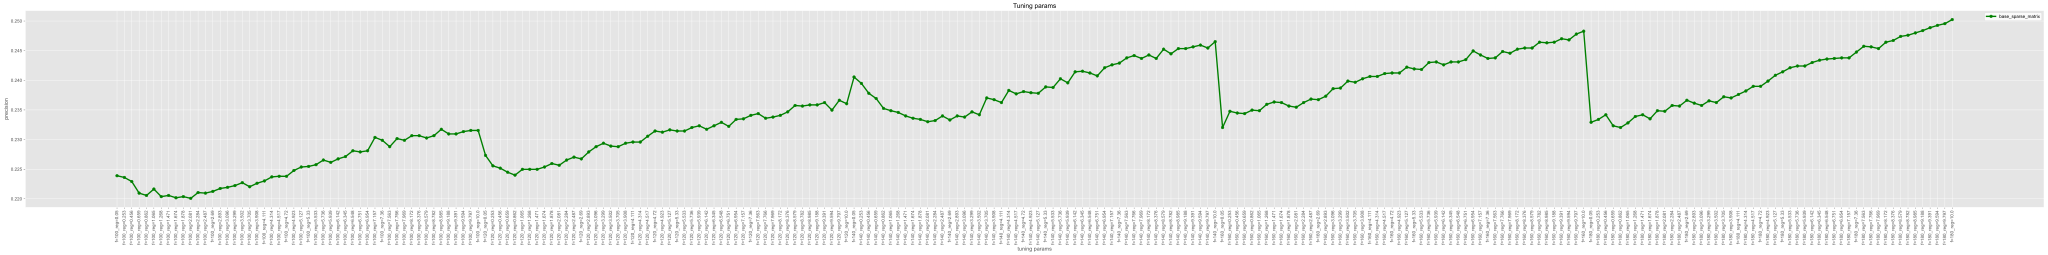

In [17]:
plt.figure(figsize=(80, 8))
plt.xlabel('tuning params')
plt.ylabel('precision')
plt.title('Tuning params')
plt.plot(list(score_dict.keys()), list(score_dict.values()), color='green', marker='o',  linewidth=3, label='base_sparse_matrix')
plt.xticks(rotation=90)
plt.legend(loc='best', facecolor='white')
plt.show()